<H1><center>E-commerce Customer Churn
<br>--------
<br><center>Data Preparation

By : Fathur Rizky Maulana

### **Contents**

0. Initial Setup
1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

### `Initial Setup`

In [2]:
# Import library eksplorasi dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #Membuat grafik
import seaborn as sns #Membuat grafik
import missingno as msno #Cek missing value
import phik #Cek phik korelasi
from sklearn.experimental import enable_iterative_imputer #Melakukan imputasi
from sklearn.impute import IterativeImputer #Melakukan iterative imputasi

# Import library sklearn
from sklearn.model_selection import train_test_split #Membagi data train dan data test
from pycaret.classification import * #Men-setting parameter dasar menggunakan pycaret
from sklearn.base import BaseEstimator, TransformerMixin #Membuat estimator
from sklearn.preprocessing import FunctionTransformer #Meneruskan argumen objek fungsi dan mengembalikan hasil dari fungsi ini

# Import library uji statistics
from scipy.stats import ks_2samp # Uji KS untuk melihat distorsi sebelum dan sesudah handling outlier

# Import library modeling
import pycaret
from pycaret.internal.preprocess.transformers import TransformerWrapper

# Setting max column
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 35)

import warnings
warnings.filterwarnings('ignore')

### `Business Problem Understanding`

**Problem Statement**

Perusahaan *startup e-commerce* terkemuka di Indonesia yang bernama **Ecompedia** saat ini sedang memiliki masalah pada bisnis yang dijalankan-nya, pada Ecompedia terdapat beberapa pelanggan yang sudah tidak lagi menjadi pelanggan atau tidak lagi berbelanja di Ecompedia atau yang biasa disebut dengan istilah ***Churn*** (`Pelanggan Tidak Loyal`). Ecompedia saat ini memiliki ***churn rate*** yang cukup tinggi, yaitu sebesar 16,33% dari total pelanggan [(perhitungan *Churn Rate*)](https://www.paddle.com/resources/calculate-churn-rate), dimana nilai ideal untuk ***churn rate*** pada *e-commerce* saat ini hanya berkisar 5% sampai 7% per tahun [(sumber)](https://www.forbes.com/advisor/business/churn-rate/). Oleh karena itu, hal tersebut akan berdampak pada jumlah pendapatan yang diterima oleh Ecompedia, karena *churn rate* yang tinggi akan diikuti dengan penurunan pendapatan perusahaan.

Di sisi lain, ketika perusahaan salah memprediksi label ***Churn*** atau **tidak *Churn*** kepada pelanggan, hal tersebut akan memberikan masalah kepada perusahaan. Contohnya, jika perusahaan akan melakukan usaha marketing ke semua pelanggan, maka besaran biaya yang dikeluarkan akan menjadi tinggi. Adapun jika perusahaan hanya memberikan usaha marketing ke sebagian pelanggan, maka perusahaan bisa kehilangan pelanggan yang sebenarnya berpotensi menjadi pelanggan yang **tidak *Churn*** (`Loyal`).

**Goals**

*Stakeholders* terkait seperti *Executive Team* dan *Marketing Team* dapat mengetahui karakteristik dari jenis pelanggan *e-commerce* Ecompedia yang loyal dan yang tidak loyal, sehingga mereka dapat membuat program-program yang tepat sesuai dengan jenis pelanggan tersebut.

Pihak *stakeholders* juga ingin memiliki kemampuan untuk dapat memprediksi calon pelanggan yang terprediksi akan loyal dan calon pelanggan mana yang terprediksi tidak loyal, sehingga dapat memfokuskan *treatment* yang sesuai dengan jenis pelanggan-nya apakah dia jenis pelanggan yang loyal atau jenis pelanggan yang tidak loyal.


Oleh karena itu, *stakeholders* terkait (*Executive Team* dan *Marketing Team*) *e-commerce* Ecompedia memerlukan kemampuan untuk dapat memprediksi pelanggan yang **tidak *Churn*** (`Loyal`) dan pelanggan yang ***Churn*** (`Tidak Loyal`), sehingga perusahaan dapat memberikan *treatment* yang sesuai dengan jenis pelanggan apakah dia ***Churn*** atau **tidak *Churn***.

#Karakteristik tersebut dapat memberikan masukan kepada perusahaan untuk

**Analytic Approach**

Metode yang digunakan untuk melakukan analisis

prediktif alasan
klasifikasi alasan

Kita sebagai **Data Scientist** akan menganalisis data pelanggan *e-commerce* untuk menemukan pola yang membedakan antara jenis pelanggan *e-commerce* yang loyal dan jenis pelanggan yang sudah tidak lagi menjadi pelanggan atau tidak lagi berbelanja di *e-commerce* (pelanggan yang tidak loyal).

Kemudian kita akan membangun model klasifikasi yang akan membantu *executive team* dan *marketing team* sebagai *stakeholders* terkait untuk dapat memprediksi jenis pelanggan loyal dan pelanggan yang tidak loyal untuk dapat menentukan strategi bisnis kedepannya.

**Metric Evaluation**

Karena kita akan memfokuskan pengguna yang *churn* (`Tidak loyal`), maka target yang kita tetapkan adalah sebagai berikut:

**Target**:   
`0` : Pengguna tidak *churn* (`Loyal`) Negative
<br>
`1` : Pengguna *churn* (`Tidak loyal`) Positive

**Metric Evaluation**:

|                   | Not Churn-Pred | Churn-Pred |
| ----------------- | -------------- | ---------- |
| **Not Churn-Act** |       TN       |     FP     |
| **Churn-Act**     |       FN       |     TP     |

**`Type 1 Error`** : **False Positive**
<br>
`Interpretasi`: Pengguna yang seharusnya tidak *churn* (**Loyal**), tapi hasil prediksi-nya sebagai pengguna *churn* (**Tidak loyal**) 
<br>
`Konsekuensi`: Kehilangan potensi pendapatan dari pengguna yang sebenarnya tidak *churn* (**Loyal**).

**`Type 2 Error`** : **False Negative**
<br>
`Interpretasi`: Pengguna yang seharusnya *churn* (**Tidak Loyal**), tapi hasil prediksi-nya sebagai pengguna tidak *churn* (**loyal**)
<br>
`Konsekuensi`: Kerugian dari biaya marketing yang dikeluarkan untuk pelanggan yang sebenarnya *churn* (**Tidak Loyal**).

Untuk memberikan gambaran konsekuensi secara kuantitatif, maka kita akan coba simulasikan perhitungan biaya yang akan berdampak kepada perusahaan berdasarkan asumsi berikut:
* Rata-rata biaya biaya marketing untuk *e-commere*
* 

Berdasarkan asumsi diatas, maka kita dapat mencoba melakukan perhitungan konsekuensi-nya sebagai berikut:
* Hilangnya potensi pendapatan dari pengguna yang berpotensi loyal => 
* Hilangnya biaya marketing untuk promo-promo =>

Berdasarkan konsekuensi diatas, langkah yang tepat untuk pemilihan model adalah model yang **mengurangi jumlah hilangnya pelanggan loyal**. Jadi kita ingin sebanyak mungkin memprediksi `kelas Positif` yang benar Positif, dan sesedikit mungkin prediksi `False Negative`. Jadi metric utama yang akan digunakan adalah Recall,

### `Data Understanding`

Dataset dan deskripsi dapat di akses pada link berikut:
<br>
[E-commerce Customer Churn](https://drive.google.com/drive/folders/1PITb78NtK9Ra6wOkQdXCIgItZkj29Ves)

| Columns                                            | Definition                                                   | 
| ------------------------------------------------- | ------------------------------------------------------------ |
| `Tenure` | Masa tenure pelanggan |
| `WarehouseToHome` | Jarak antara warehouse ke rumah pelanggan |
| `NumberOfDeviceRegistered` | Jumlah perangkat yang terdaftar |
| `PreferedOrderCat` | Kategori yang disukai pelanggan bulan lalu |
| `SatisfactionScore` | Skor kepuasan pelanggan terhadap service |
| `MaritalStatus` | Status pernikahan pelanggan |
| `NumberOfAddress` | Jumlah alamat yang terdaftar |
| `Complain` | Adakah complain dalam satu bulan terakhir |
| `DaySinceLastOrder` | Hari sejak pemesanan terakhir |
| `CashbackAmount` | Rata-rata cashback bulan lalu |
| `Churn` | Status churn pelanggan |

**`Complain`** == `0` : Tidak Ada *complain*, `1` : ada *complain*
<br>
**`Churn`** == `0` : Tidak *churn*, `1` : *Churn*

In [3]:
# Import file CSV

df = pd.read_csv("D:\Purwadhika JCDS\Capstone Project\Modul-3\data\\raw\data_ecommerce_customer_churn.csv")
print(f'Jumlah baris dan kolom: {df.shape}')

df.sample(5)

Jumlah baris dan kolom: (3941, 11)


,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
2449,0.0,11.0,4,Mobile,3,Single,1,0,0.0,129.66,0
1311,1.0,15.0,5,Mobile Phone,3,Single,3,1,3.0,164.89,1
2742,0.0,NaN,4,Mobile,4,Married,2,1,0.0,124.13,1
2934,1.0,7.0,5,Mobile Phone,4,Single,3,1,3.0,146.74,1
2378,8.0,17.0,4,Mobile Phone,3,Married,3,1,1.0,147.20,0


#### **Initial Assessment**

In [4]:
# Check karakteristik dataset

pd.DataFrame(
        {
        'feature': df.columns.values,
        'data_type': df.dtypes.values,
        'total_row': df.isna().count().values,
        'total_null': df.isna().sum().values,
        '%null_value': df.isna().mean().values * 100,
        'n_unique': df.nunique().values,
        'sample_unique': [df[col].unique() for col in df.columns]
        }
    )

,feature,data_type,total_row,total_null,%null_value,n_unique,sample_unique
0,Tenure,float64,3941,194,4.922608,36,"[15.0, 7.0, 27.0, 20.0, 30.0, 1.0, 11.0, 17.0,..."
1,WarehouseToHome,float64,3941,169,4.288252,33,"[29.0, 25.0, 13.0, 15.0, 16.0, 11.0, 12.0, 7.0..."
2,NumberOfDeviceRegistered,int64,3941,0,0.000000,6,"[4, 3, 6, 2, 5, 1]"
3,PreferedOrderCat,object,3941,0,0.000000,6,"[Laptop & Accessory, Mobile, Fashion, Others, ..."
4,SatisfactionScore,int64,3941,0,0.000000,5,"[3, 1, 4, 2, 5]"
5,MaritalStatus,object,3941,0,0.000000,3,"[Single, Married, Divorced]"
6,NumberOfAddress,int64,3941,0,0.000000,14,"[2, 5, 7, 8, 3, 1, 9, 4, 10, 11, 6, 19, 22, 21]"
7,Complain,int64,3941,0,0.000000,2,"[0, 1]"
8,DaySinceLastOrder,float64,3941,213,5.404720,22,"[7.0, nan, 8.0, 11.0, 2.0, 1.0, 4.0, 3.0, 6.0,..."
9,CashbackAmount,float64,3941,0,0.000000,2335,"[143.32, 129.29, 168.54, 230.27, 322.17, 152.8..."


__Insight :__
<br>

**Numerical Variable:**
- `Discrete` : NumberOfDeviceRegistered, NumberOfAddress
- `Continue` : Tenure, WarehouseToHome, DaySinceLastOrder, CashbackAmount
<br>

**Categorical variable:**
- `Nominal` : PreferedOrderCat, MaritalStatus, Complain, **Churn**
- `Ordinal` : SatisfactionScore

`Target`: Churn

#### **Numerical variable**

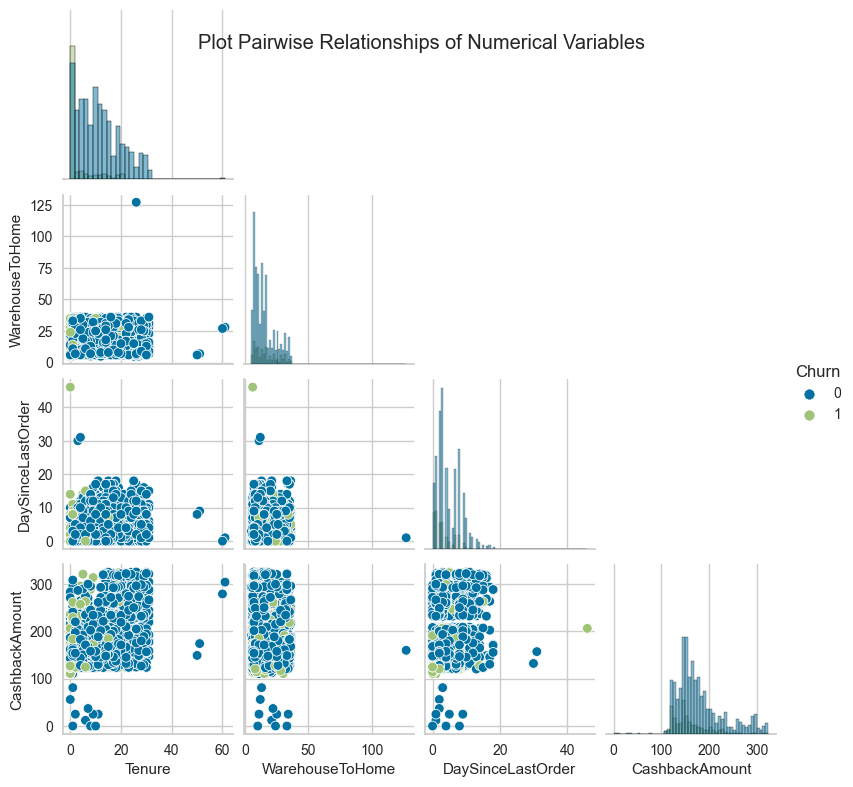

In [5]:
# Cek numerical variabel 

numerical = [var for var in df.columns if var not in ["PreferedOrderCat", "MaritalStatus", "Complain", "SatisfactionScore", "NumberOfDeviceRegistered", "NumberOfAddress"]]

graph = sns.pairplot(df[numerical], height=2.0, corner=True, diag_kind="hist", hue="Churn")
graph.fig.suptitle("Plot Pairwise Relationships of Numerical Variables", y=0.95)
plt.show()

__Insight :__
* ...
* ...
* ...

#### **Categorical variable**

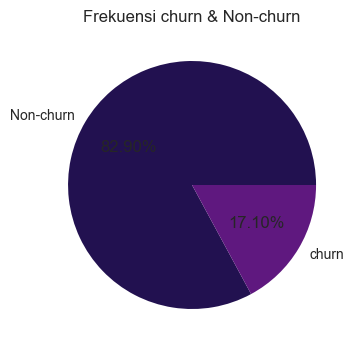

In [6]:
# Cek Categorical Variabel for Churn Feature

temp_df = df.Churn.value_counts(normalize=True) * 100

plt.subplots(figsize=(4, 5))
plt.title("Frekuensi churn & Non-churn")
plt.pie(
    x=[temp_df.loc[0], temp_df.loc[1]],
    labels=['Non-churn', 'churn'], 
    colors=sns.color_palette('magma'),
    autopct='%.2f%%'
)
plt.show()

__Insight :__
* 

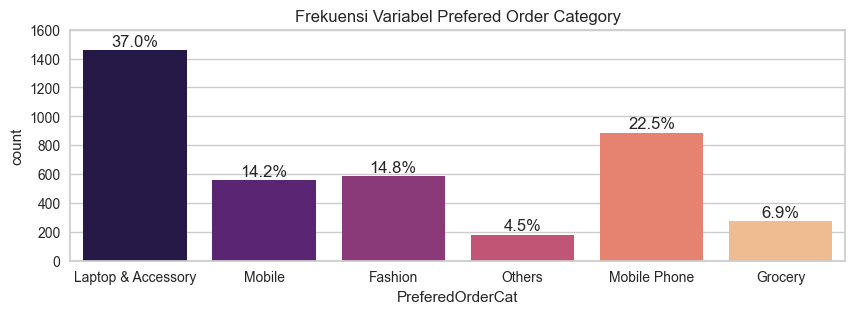

In [7]:
# Cek Categorical Variabel fo Prefered Order Category Feature

plt.subplots(figsize=(10, 3))
plt.title("Frekuensi Variabel Prefered Order Category")
ax = sns.countplot(data=df, x="PreferedOrderCat", palette="magma")
ax.set_ylim([0, 1600])

for p in ax.patches:
    percentage = f'{100 * p.get_height() / len(df):.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

plt.show()

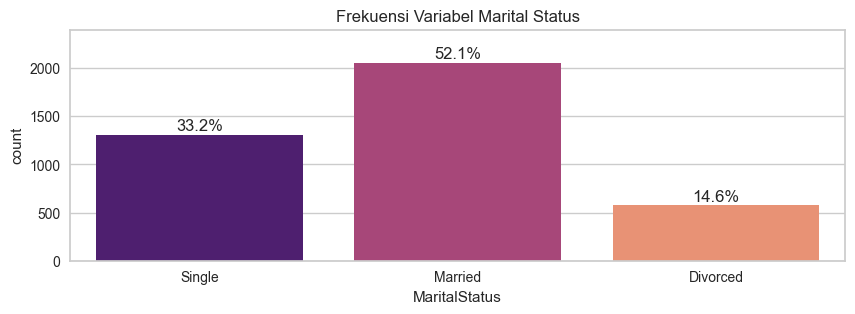

In [8]:
# Cek Categorical Variabel fo Marital Status Feature

plt.subplots(figsize=(10, 3))
plt.title("Frekuensi Variabel Marital Status")
ax = sns.countplot(data=df, x="MaritalStatus", palette="magma")
ax.set_ylim([0, 2400])

for p in ax.patches:
    percentage = f'{100 * p.get_height() / len(df):.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

plt.show()

### `Data Preparation`

In [9]:
# find the lower bound and upper bound variable

def CheckBound(x):
    Q1 = int(x.quantile([0.25]).values)
    Q3 = int(x.quantile([0.75]).values)
    IQR = Q3-Q1
    LowerBound = Q1-1.5*IQR
    UpperBound = Q3+1.5*IQR
    total = len(df[(x<LowerBound) | (x>UpperBound)])

    result = f'''
        Lower Bound is: {LowerBound}
        Upper Bound is: {UpperBound}
        Total Outlier is: {total}'''
    
    return result

#### **Finding Problematic Data**

##### **Data Duplikat dan Typo**, Deteksi dan kuantifikasi data duplikat dan kesalahan ketik:

**Data Duplikat**

In [10]:
# Cek Data Duplikat

nDuplicated = df.duplicated().sum()
DuplicatedPerc = round((df.duplicated().sum()/df.shape[0])*100,2)
print(f'Jumlah Data Duplikat: {nDuplicated}\nPersentase Data Duplikat: {DuplicatedPerc}%')

Jumlah Data Duplikat: 671
Persentase Data Duplikat: 17.03%


__Insight:__
* Terdapat 671 data duplikat dari 3.941 baris data dengan persentase sebesar 17.03%
* Dari dataset yang disajikan tidak ada variabel tipe "**ID Data**", sehingga data duplikat dapat dianggap benar-benar duplikat
* Solution : Drop data duplikat tersebut

**Data typo**

In [11]:
# Cek data typo untuk categorical variable

CategoryVar = ["PreferedOrderCat", "MaritalStatus"]
for i in CategoryVar:
    uniqueValue = df[i].unique()
    print(f"Feature {i}: {uniqueValue}")

Feature PreferedOrderCat: ['Laptop & Accessory' 'Mobile' 'Fashion' 'Others' 'Mobile Phone' 'Grocery']
Feature MaritalStatus: ['Single' 'Married' 'Divorced']


__Insight:__
* Pada feature PreferedOrderCat terdapat kategori "Mobile" dan "Mobile Phone"
* Solution : Ubah kategori "Mobile" menjadi kategori "Mobile Phone"

**Handling Data Typo** dilakukan di preprocessing pada setup pycaret (Karena kita ingin ketika data baru dimasukan ke model ML ini kategori "Mobile" pada kolom "PreferedOrderCat" langsung dikenali sebagai kategori "Mobile Phone")

**Handling data duplikat**:

In [12]:
# Handling data duplicate

df.drop_duplicates(inplace=True)

##### **Missing Value**, Deteksi dan kuantifikasi missing value:

<Axes: >

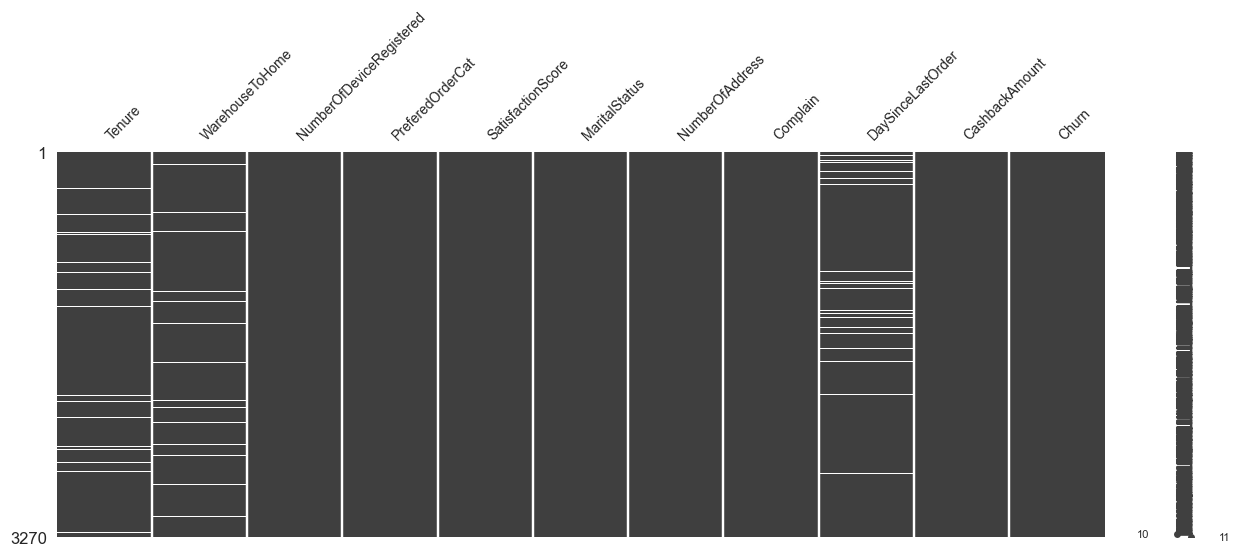

In [13]:
# Cek missing value

msno.matrix(df, figsize=(15,5), fontsize=10)

In [14]:
# Cek jumlah missing value masing-masing kolom

print(df.isna().sum())

# Kalkulasi missing value
print(f'''\nJumlah total missing value: {df.isnull().sum().sum()}
Jumlah baris yang terdapat missing value: {df[df.isnull().any(axis=1)].shape[0]}
Persentase baris dengan missing value: {round(df.isnull().sum().sum()/df.shape[0]*100,2)}%''')

Tenure                      160
WarehouseToHome             135
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
DaySinceLastOrder           181
CashbackAmount                0
Churn                         0
dtype: int64

Jumlah total missing value: 476
Jumlah baris yang terdapat missing value: 476
Persentase baris dengan missing value: 14.56%


__Insight :__
* Terdapat tiga kolom missing value "Tenure"(160), "WarehouseToHome"(135), "DaySinceLastOrder"(182) (float64)
* Jumlah total missing value adalah 476, dan lokasi missing value di baris yang berbeda-beda (476 baris), dengan presentase missing value 14.56% dari total data tersedia
* Kita tidak bisa lakukan drop missing value (karena jumlah missing value yang cukup besar 14.56%)
* Missing value tidak menunjukan pola tertentu/ acak
* Perlu analisis lebih lanjut mengenai handling missing value

In [15]:
# Cek corelations matrix untuk kolom "Tenure", "WarehouseToHome", "DaySinceLastOrder"

# fig, ax = plt.subplots(2, 1, figsize=(15, 10))
# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.1)

# cols = df.columns
# corr = df[cols].phik_matrix()
# corr_mask = np.triu(np.ones_like(corr, dtype=bool))
# sns.heatmap(corr, mask=corr_mask, vmin=0, vmax=1, annot=True, cmap="YlGnBu", ax=ax[0])

# sig = df[cols].significance_matrix()
# sig_mask = np.triu(np.ones_like(sig, dtype=bool))
# sns.heatmap(sig, mask=sig_mask, annot=True, cmap="YlGnBu", ax=ax[1])

# ax[0].set_title(f"Correlation $\phi_K$")
# ax[1].set_title(f"Significance matrix")



__Insight :__
* Dari 3 kolom yang memiliki mising value ("Tenure", "WarehouseToHome", "DaySinceLastOrder"), tidak ada yang berkorelasi signifikan dengan feature lainnya
* Solution : Lakukan imputasi menggunakan metode Multivariate Imputation

Handling missing value dilakukan di preprocessing setup pycaret

##### **Outlier,** Deteksi dan kuantifikasi outlier:

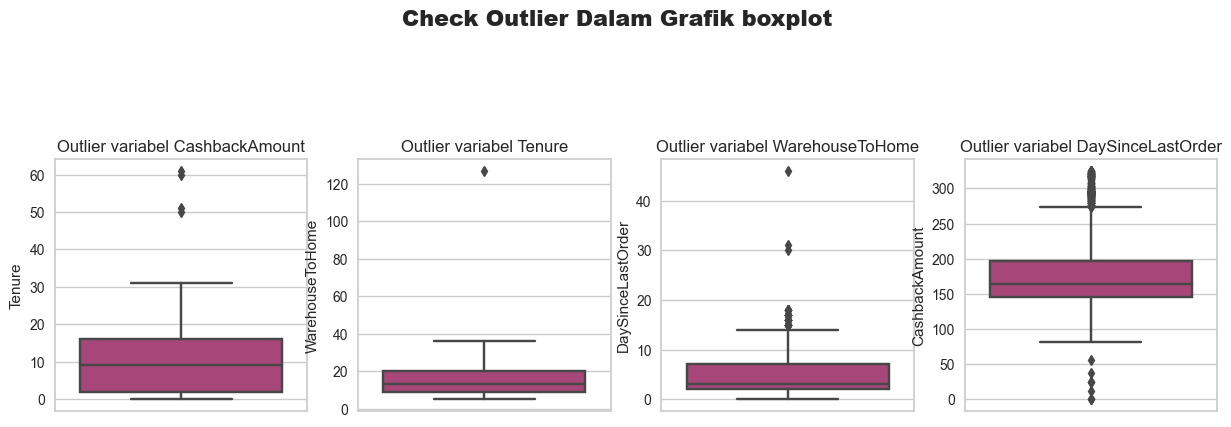

In [73]:
# Cek data outlier in continue variable (Tenure, WarehouseToHome, DaySinceLastOrder, CashbackAmount)

contVar = ["Tenure", "WarehouseToHome", "DaySinceLastOrder", "CashbackAmount"]

# Cek Categorical Variabel fo Marital Status Feature

ax = plt.figure(figsize=(15, 15))
for i in range(0, len(contVar)):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=df[contVar[i]], palette="magma")
    plt.title(f"Outlier variabel {contVar[i-1]}")
    plt.suptitle("Check Outlier Dalam Grafik boxplot", fontsize=16, ha="center", weight="extra bold")

# plt.title("Check Outlier Dalam Grafik Scatter")
plt.show()

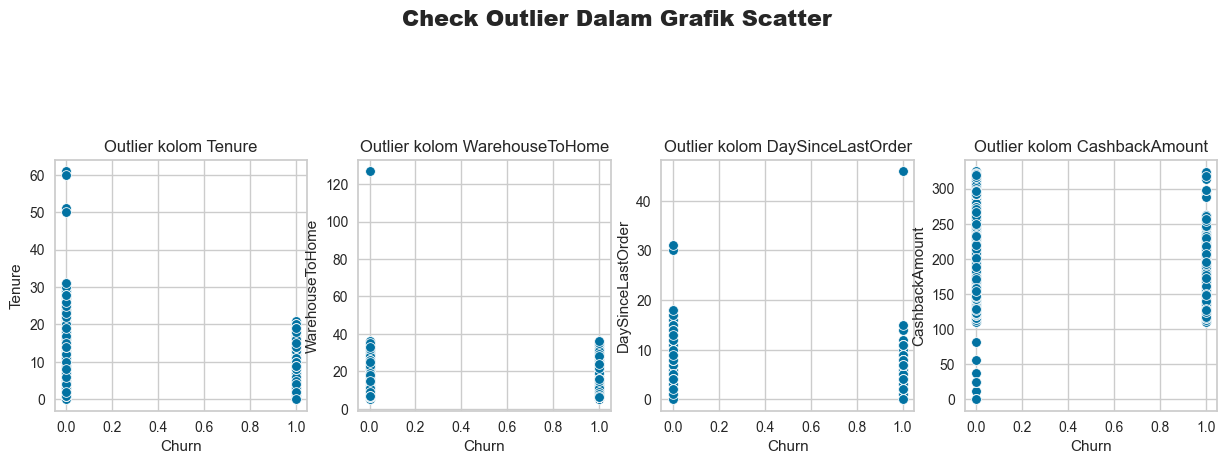

In [87]:
# Scatter plot

contVar = ["Tenure", "WarehouseToHome", "DaySinceLastOrder", "CashbackAmount"]

ax = plt.figure(figsize=(15,15))
for i in range(0, len(contVar)):
    plt.subplot(4, 4, i+1)
    sns.scatterplot(x=df["Churn"], y=df[contVar[i]])
    # plt.tight_layout()
    plt.xlabel("Churn") # x-axis label 
    plt.ylabel(contVar[i]) # y-axis label
    plt.title(f"Outlier kolom {contVar[i]}")

plt.suptitle("Check Outlier Dalam Grafik Scatter", fontsize=16, weight="extra bold")

plt.show()

In [ ]:
# Check Pesebaran data

contVar = ["Tenure", "WarehouseToHome", "DaySinceLastOrder", "CashbackAmount"]

fig, axes = plt.subplots(4, 1, figsize=(20, 8))
for i in range(0, len(contVar)):
    axes[i].boxplot(df.contVar[i], patch_artist=True, meanline=True, showmeans=True, vert=False)

axes[0].set_xlabel("trip_duration_minute (minutes)", fontsize=11)
axes[1].set_xlabel("trip_distance (miles)", fontsize=11)
axes[2].set_xlabel("fare_amount ($)", fontsize=11)
axes[3].set_xlabel("tip_amount ($)", fontsize=11)

fig.suptitle("Data Outlier Check", fontsize=20)
plt.subplots_adjust(left=None, bottom=None, right=None, wspace=1.5, hspace=1.5)
plt.show()

In [18]:
# Melihat lower bound, upper bound, outlier, dan persentase outlier
for i in range(0, len(contVar)):
    Q1 = df[contVar[i]].quantile(0.25)
    Q3 = df[contVar[i]].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound =  Q1 - (1.5 * IQR)
    upper_bound =  Q3 + (1.5 * IQR)
    condition = (df[contVar[i]]< lower_bound) | (df[contVar[i]]> upper_bound)
    outlier = df.loc[condition, contVar[i]].count()
    PersentaseOutlier = outlier/df[contVar[i]].count()*100
    print(f"{contVar[i]}\nLower Bound   : {round(lower_bound,2)}\nUpper Bound   : {round(upper_bound,2)}\nJumlah Outlier: {outlier} ({round(PersentaseOutlier,2)}%)\n")

Tenure
Lower Bound   : -19.0
Upper Bound   : 37.0
Jumlah Outlier: 4 (0.13%)

WarehouseToHome
Lower Bound   : -7.5
Upper Bound   : 36.5
Jumlah Outlier: 1 (0.03%)

DaySinceLastOrder
Lower Bound   : -5.5
Upper Bound   : 14.5
Jumlah Outlier: 40 (1.29%)

CashbackAmount
Lower Bound   : 69.02
Upper Bound   : 274.0
Jumlah Outlier: 253 (7.74%)



__Insight :__
* Jumlah outlier pada kolom "Tenure" dan "WarehouseToHome" kecil yaitu 4 dan 1 baris. Solusi drop kolom
* Outlier pada kolom "DaySinceLastOrder" dan "CashbackAmount" bisa diabaikan karena diabaikan sebagai nilai yang wajar apabila memiliki nilai variansi yang tinggi
* Outlier pada kolom "DaySinceLastOrder" dan "CashbackAmount" akan diproses pada bagian preprocessing

**Handling outlier** dilakukan di preprocessing setup pycaret

##### **Rare label**, Deteksi dan kuantifikasi rare value:

In [19]:
# Cek target model

(df["Churn"].value_counts(normalize=True) * 100).sort_index()

0    83.669725
1    16.330275
Name: Churn, dtype: float64

__Insight :__
* Imbalance data, perbandingan label **non-churn** (83.64%) lebih banyak dibanding label **churn** (16.35%)
* 

#### **Dealing with The Problem**

Bagi dataset menjadi train set dan test set:

In [20]:
# Membagi data train set dan data test set

df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train.shape, df_test.shape

((2616, 11), (654, 11))

Setting parameter dasar untuk menginisialisasi experiment dan membuat pipeline transformasi:

In [21]:
# Bikin class untuk handling Data typo dan imputasi

class clearTypoImput(BaseEstimator, TransformerMixin):

    def _init_(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X["PreferedOrderCat"].replace("Mobile", "Mobile Phone", inplace=True) #Replace kategori "Mobile" to "Mobile Phone"
        imputasi = IterativeImputer(max_iter=10, random_state=0) #Imputasi missing value
        cols = ["Tenure", "WarehouseToHome", "DaySinceLastOrder"] #Imputasi missing value
        X[cols] = imputasi.fit_transform(X[cols]) #Imputasi missing value
        return X.to_numpy()

In [22]:
# Class untuk handling drop

import pdpipe as pdp

class handlingDrop(BaseEstimator, TransformerMixin):
    
    def _init_(self):
        pass

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        # X[list(X.columns)].drop_duplicates(inplace=True) #Drop duplikat n=671
        # X[["Tenure", "WarehouseToHome"]].drop(X[(X["Tenure"]>33) | (X["WarehouseToHome"]>36.5)].index, inplace=True) #Drop outlier n=5
        return X.to_numpy()

In [23]:
# Membuat pipeline transformasi

customPipeline = [
    ("clearTypoImput", TransformerWrapper(transformer=clearTypoImput())),
    # ("handlingDrop", TransformerWrapper(transformer=handlingDrop()))
]

In [24]:
# Setting parameter dasar menggunakan pycaret

clf = setup(
    # general setup
    data=df_train, 
    target="Churn",
    train_size=0.8,
    verbose=False,
    preprocess=False,

    # feature setup
    # ignore_features=[],

    # experiment setup
    session_id=42, 
    log_data=True,
    log_plots=True,

    # data wrangling
    imputation_type=None, 
    remove_outliers=None,
    # outliers_method='iforest',
    custom_pipeline=customPipeline,
    custom_pipeline_position=0,
)

Proses scaling dan encoding:

Feature Creation:

Feature Selection:

### `Modeling`

#### **Model Experiment**

Bandingkan model regresi atau klasifikasi untuk mendapatkan benchmark model:

Lakukan optimasi model benchmark:

Validasi silang 10-fold untuk mendapatkan rentang kinerja model:

**Model Intepretation**

* .....
* .....
* .....

**Model Limitation**

* .....
* .....
* .....


### `Conclusion`

Beberapa hal yang dapat disimpulkan yaitu:

* ....
* ....
* ....

### `Recommendations`

Hal yang dapat dilakukan untuk mengembangkan model agar lebih baik lagi, seperti:

* ....
* ....
* ....